In [1]:
import pandas as pd

import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## 1. Data Exploration

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
df.airline.value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [7]:
df.source_city.value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [8]:
df.destination_city.value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [9]:
df.arrival_time.value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [10]:
df.stops.value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [11]:
df['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

## 2. Preprocessing

In [12]:
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
df = df.drop(['flight'], axis=1)

In [14]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)

In [16]:
df.stops = pd.factorize(df.stops)[0]

In [17]:
df.stops.value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

In [18]:
df.head(5)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


In [19]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

In [20]:
one_hot_df = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['airline']))

NameError: name 'one_hot' is not defined

In [76]:
one_hot_df.head()

,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
columns_to_encode = ['airline', 'source_city', 'destination_city', 'arrival_time', 'departure_time']
for column in columns_to_encode:
    encoder = OneHotEncoder(sparse_output=False)  # Produces a dense array
    one_hot_encoding_feature = encoder.fit_transform(df[[column]])  # No need for .toarray()
    one_hot_df = pd.DataFrame(one_hot_encoding_feature, columns=encoder.get_feature_names_out([column]))
    
    df = df.drop(columns=[column])  # Drop the original column
    df = pd.concat([df, one_hot_df], axis=1)  # Concatenate the one-hot encoded columns

# Display the resulting DataFrame
print(df.head)


<bound method NDFrame.head of         stops  class  duration  days_left  price  airline_AirAsia  \
0           0      0      2.17          1   5953              0.0   
1           0      0      2.33          1   5953              0.0   
2           0      0      2.17          1   5956              1.0   
3           0      0      2.25          1   5955              0.0   
4           0      0      2.33          1   5955              0.0   
...       ...    ...       ...        ...    ...              ...   
300148      1      1     10.08         49  69265              0.0   
300149      1      1     10.42         49  77105              0.0   
300150      1      1     13.83         49  79099              0.0   
300151      1      1     10.00         49  81585              0.0   
300152      1      1     10.08         49  81585              0.0   

        airline_Air_India  airline_GO_FIRST  airline_Indigo  airline_SpiceJet  \
0                     0.0               0.0             0.0 

## 3. Training model

Now we are only left with binary and numeric values in our features, so we can feed all of this directly into a regression model

In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
reg = RandomForestRegressor(n_jobs=-1) #  we use ALL CPU cores available 
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [24]:
reg.score(X_test, y_test)

0.9849755305576864

In [25]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.9849755305576864
MAE: 1076.4492496629925
MSE: 7744847.667289891
RMSE: 2782.9566412881627


In [27]:
y_trainn = reg.predict(X_train)
print('R2:', r2_score(y_trainn, y_train))
print('MAE:', mean_absolute_error(y_trainn, y_train))
print('MSE:', mean_squared_error(y_trainn, y_train))
print('RMSE:', math.sqrt(mean_squared_error(y_trainn, y_train)))

R2: 0.9975085972743718
MAE: 418.41291223003356
MSE: 1274855.6354381554
RMSE: 1129.0950515515315


In [28]:
reg.predict(X_test)

array([ 7342.94, 70871.16,  6195.  , ...,  6509.21,  3881.02, 71093.58])

In [29]:
from tqdm import tqdm

Text(0.5, 1.0, 'Prediction vs Actual Price')

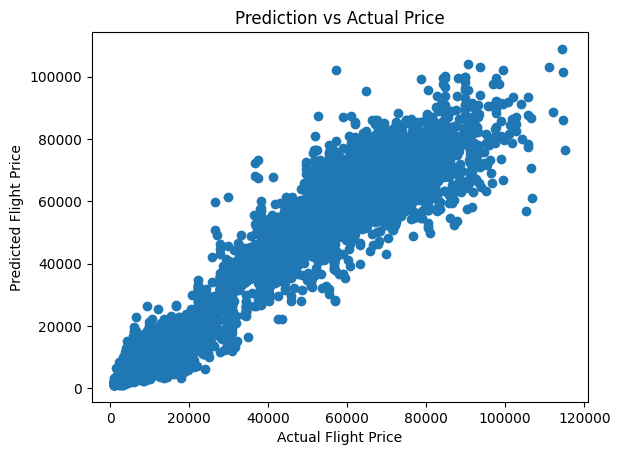

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Prediction vs Actual Price')

In [32]:
from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(n_jobs=-1)

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 30],
    'min_samples_split': [2, 10], 
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_ 


C:\Users\pizza\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


KeyboardInterrupt: 

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV


In [34]:
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [30],
    'min_samples_split': randint(2, 11), 
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, 
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [35]:
param_dist = {
    'n_estimators': [100],
    'max_depth': [30],
    'min_samples_split': [8], 
    'min_samples_leaf': [2],
    'max_features': ['auto', 'sqrt']
}

reg = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=2, cv=3, 
                                   scoring='neg_mean_squared_error', verbose=2, random_state=10, n_jobs=-1)

random_search.fit(X_train, y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


C:\Users\pizza\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [43]:
best_regressor.score(X_test, y_test)

0.9860961064546454

In [ ]:
y_trainn = reg.predict(X_train)
print('R2:', r2_score(y_trainn, y_train))
print('MAE:', mean_absolute_error(y_trainn, y_train))
print('MSE:', mean_squared_error(y_trainn, y_train))
print('RMSE:', math.sqrt(mean_squared_error(y_trainn, y_train)))